This project sees the use of image classification methods in order to identify digits from the sklearn dataset: load_digits. Two Numpy models and one Keras model were created in order to test how well they are able to identify the correct digit and see which library was faster. Testing was conducted by plotting accuracy and using test images from the dataset to see the predicted values on plots. All the relevent imports are shown below. 

In [13]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random
import time

The dataset, functions used for the numpoy models, and image dictionary are shown below. The dataset has already been imported and has been assigned to the variable *digits*. The three functions: **tanh(x)**, **tanh_derivative(x)**, and **sigmoid(x)** were used for the numpy models in the hidden layers. The image dictionary was created in order to map the predicted value from the models to an image in the dataset so that it could be plotted alongside the test image. 

In [14]:
digits = load_digits()

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

image_dict = {0: digits.images[0].reshape(8,8), 1: digits.images[1].reshape(8,8), 2: digits.images[2].reshape(8,8), 
              3: digits.images[3].reshape(8,8), 4: digits.images[4].reshape(8,8), 5: digits.images[5].reshape(8,8),
              6: digits.images[6].reshape(8,8), 7: digits.images[7].reshape(8,8), 8: digits.images[8].reshape(8,8),
              9: digits.images[9].reshape(8,8)}

All the models created are Multi-Layer-Perceptrons and the dataset was split using the train_test_split function. Both numpy models utilize an initial hidden layer of size 32, and an output layer size of the number of unique digits (10). They are also trained for 1000 epochs with a learning rate of 0.1. The first model has a total of 42 neurons and has its weights initialized using the randn() function given the input, hidden, and output sizes. The model is then trained by looping thorugh the number of epochs. During each epoch, the weights of the model multiplied with their respective layers and are updated based on the differences between predicted and actual results. Finally, the time taken to train the model, as well as a graph of the loss and accuracy counts are displayed. 

Training for first model: 1.6571409702301025 seconds


Text(0.5, 1.0, 'Model Accuracy')

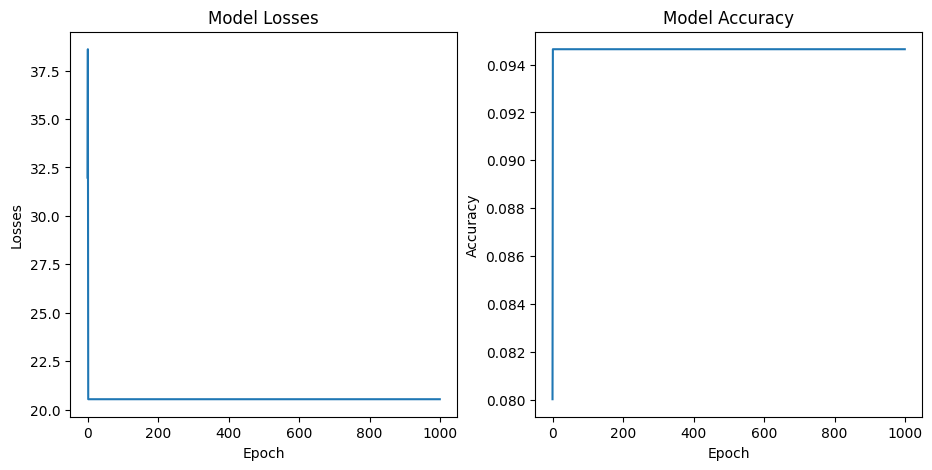

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=100)

# Define the neural network architecture (one hidden layer being tanh)
input_size = X_train.shape[1]
hidden_size = 32
output_size = len(np.unique(y_train))

# Initialize the weights
W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)


# Train the model
loss_tracker = []
accuracy_list = []
learning_rate = 0.1
num_epochs = 1000

#Record the time taken to train
start_time = time.time()

for epoch in range(num_epochs):
    #W1 being multiplied by the training images
    #W2 being multipled by the output of the hidden layer
    hidden_layer = tanh(np.dot(X_train, W1))
    output_layer = tanh(np.dot(hidden_layer, W2))

    loss_tracker.append(np.mean((output_layer - y_train.reshape(-1,1))**2))
    accuracy_list.append(np.mean(np.argmax(output_layer, axis=1) == y_train))

    # Backward pass
    output_layer_error = output_layer - y_train.reshape(-1, 1)
    output_layer_change = output_layer_error * tanh_derivative(output_layer)
    hidden_layer_error = np.dot(output_layer_change, W2.T)
    hidden_layer_change = hidden_layer_error * tanh_derivative(hidden_layer)

    # Update the weights
    W2 -= learning_rate * np.dot(hidden_layer.T, output_layer_change)
    W1 -= learning_rate * np.dot(X_train.T, hidden_layer_change)

end_time = time.time()

print(f"Training time for first model: {end_time - start_time} seconds")

# Plot the loss and accuracy graphs
fig = plt.figure(figsize=(11, 5))
plt.subplot(1,2,1) 
plt.plot(loss_tracker)
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.title('Model Losses')

plt.subplot(1,2,2)
plt.plot(accuracy_list)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')



The code below was used to test the initial NumPy model. From the results, it's clear that the model is not very good at predicting the values of the digits as it only predicts 0. This could be a result of having the output layer
's activation function being the derivative of tanh() since that function is centered around 0. 

In [16]:
def test_model():
    ran_num = random.randint(0, 1796)
    test_image = digits.images[ran_num]
    predicted_digit = 0
    
    #Reshape image to use in the model
    test_image /= 16.0  
    test_image = test_image.reshape(1, -1)

    # Classify the image using the 1st model
    hidden_layer = tanh(np.dot(test_image, W1))
    output_layer = tanh(np.dot(hidden_layer, W2))
    predicted_digit = np.argmax(output_layer)
    predicted_image = image_dict[predicted_digit]

    #plot the results
    fig = plt.figure(figsize=(8, 4))
    plt.subplot(1,2,1)
    plt.imshow(test_image.reshape(8, 8), cmap='gray')
    plt.xlabel(f'Actual Digit: {digits.target[ran_num]}')
    plt.subplot(1,2,2)
    plt.imshow(predicted_image, cmap='gray')
    plt.xlabel(f'Predicted Digit: {predicted_digit}')

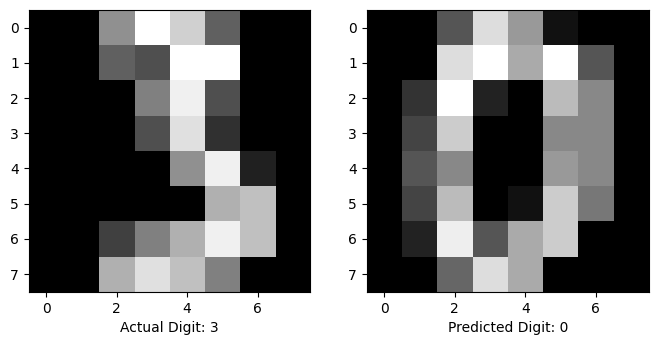

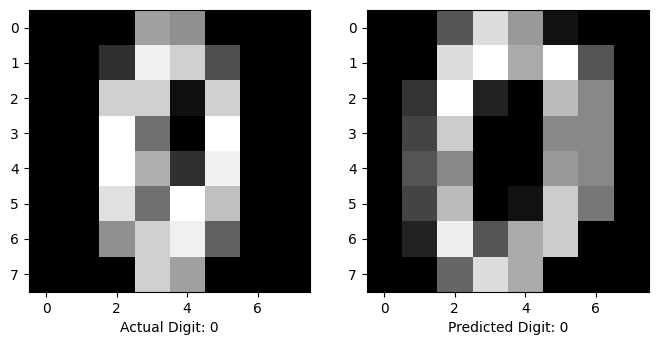

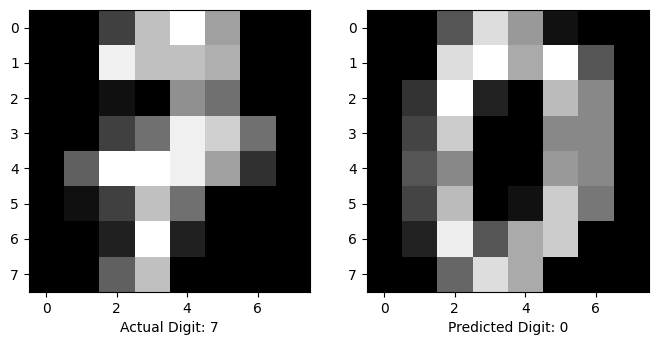

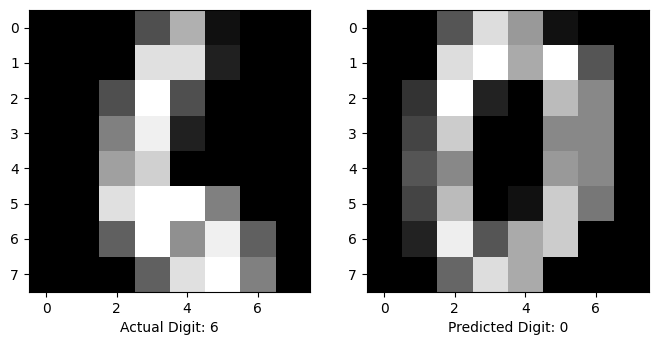

In [17]:
test_model()
test_model()
test_model()
test_model()

The second NumPy model utilized a two hidden layer approach, that being first a tanh activation function and then a sigmoid function, and the softmax function was used for the output layer activation function. The code starts off by initializing the training and testing data and setting up the weights. The forward function calculates the output probabilities of a given input image. It then moves the image through the network by computing the output probabilities for each class using the current weights and biases. It applies the activation functions (tanh and sigmoid) to the hidden layers, and uses the softmax function as the activation function for the output layer to generate the probabilities. The backward function below basically calculates how well the current model performed by calculating the difference in predicted and actual data results and uses that to help update the weight variables via matrix multiplication. It's similiar to the error calculation done in the for loop of the first model, where the difference between actual and predicted data are calculated and used to update the weights. Once all the functions have been defined, the model was then trained using the same number of epochs and learning rate as the first one. The plots of accuracy and loss were also created and displayed. 

Training for second model: 3.506575107574463 seconds


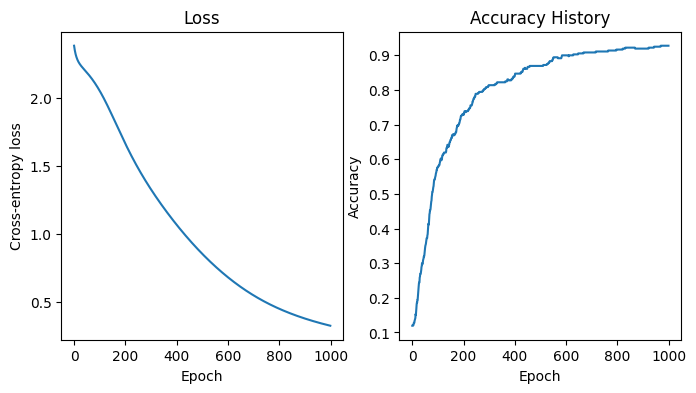

In [18]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=100)

# Normalize the input data
X_train = X_train / 16.0
X_test = X_test / 16.0

# Define the architecture for the 2nd model
input_size = X_train.shape[1] 
hidden_size1 = 32
hidden_size2 = 16
output_size = len(np.unique(y_train)) 

# Initialize the weights
W1 = np.random.randn(input_size, hidden_size1) / np.sqrt(input_size)
b1 = np.zeros(hidden_size1)
W2 = np.random.randn(hidden_size1, hidden_size2) / np.sqrt(hidden_size1)
b2 = np.zeros(hidden_size2)
W3 = np.random.randn(hidden_size2, output_size) / np.sqrt(hidden_size2)
b3 = np.zeros(output_size)

# Define the forward pass function
def forward(X):
    # First hidden layer
    z1 = np.dot(X, W1) + b1
    a1 = tanh(z1)

    # Second hidden layer
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    # Output layer
    z3 = np.dot(a2, W3) + b3
    exp_z3 = np.exp(z3)
    probs = exp_z3 / np.sum(exp_z3, axis=1, keepdims=True)

    return probs

# Define the cross-entropy loss function
def cross_entropy_loss(probs, y):
    N = len(y)
    log_probs = -np.log(probs[range(N), y])
    loss = np.sum(log_probs) / N
    return loss

# Define the backward pass function
def backward(X, y, probs):
    N = len(y)
    d3 = probs
    d3[range(N), y] -= 1
    z1 = np.dot(X, W1) + b1
    a1 = tanh(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)

    dW3 = np.dot(a2.T, d3) / N
    db3 = np.sum(d3, axis=0) / N

    da2 = np.dot(d3, W3.T)
    dz2 = da2 * (a2 * (1 - a2))
    dW2 = np.dot(a1.T, dz2) / N
    db2 = np.sum(dz2, axis=0) / N

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * (1 - a1 ** 2)
    dW1 = np.dot(X.T, dz1) / N
    db1 = np.sum(dz1, axis=0) / N

    return dW1, db1, dW2, db2, dW3, db3

#Train the model
loss_list = []
accuracy_list = []
learning_rate = 0.1
epochs = 1000

start_time = time.time()
#Record time taken for model
for i in range(epochs):
    probs = forward(X_train)
    loss = cross_entropy_loss(probs, y_train)
    loss_list.append(loss)

    # Backward pass
    dW1, db1, dW2, db2, dW3, db3 = backward(X_train, y_train, probs)

    # Update the weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3
   
    probs = forward(X_test)
    predictions = np.argmax(probs, axis=1)
    accuracy = np.mean(predictions == y_test)
    accuracy_list.append(accuracy)

end_time = time.time()

print(f"Training time for second model: {end_time - start_time} seconds")

# Plot the loss and accuracy 
fig = plt.figure(figsize=(8, 4))
plt.subplot(1,2,1)
plt.plot(loss_list)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Cross-entropy loss")

plt.subplot(1,2,2)
plt.plot(range(num_epochs), accuracy_list)
plt.title("Accuracy History")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

A second test function was created to see the results from the second model when given a random test image. The second model fairs a lot better when compared to the first as it was actually able to acurattly predict the four test images given. 

In [19]:
def test_model2():
    ran_num = random.randint(0, 1796)
    test_image = digits.images[ran_num]

    probs = forward(test_image.reshape(1,-1))
    predicted_digit = np.argmax(probs)
    predicted_image = image_dict[predicted_digit]   

    fig = plt.figure(figsize=(8, 4))
    plt.subplot(1,2,1)
    plt.imshow(test_image.reshape(8, 8), cmap='gray')
    plt.xlabel(f'Actual Digit: {digits.target[ran_num]}')
    plt.subplot(1,2,2)
    plt.imshow(predicted_image, cmap='gray')
    plt.xlabel(f'Predicted Digit: {predicted_digit}')

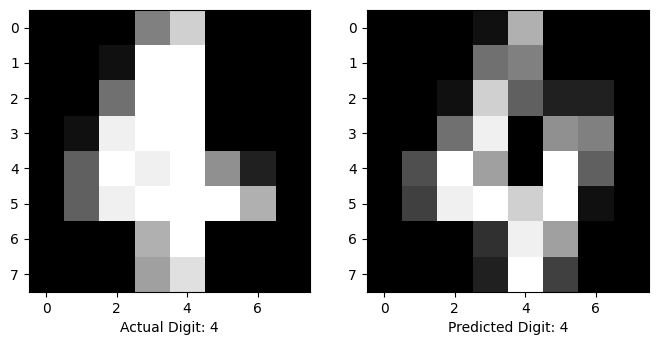

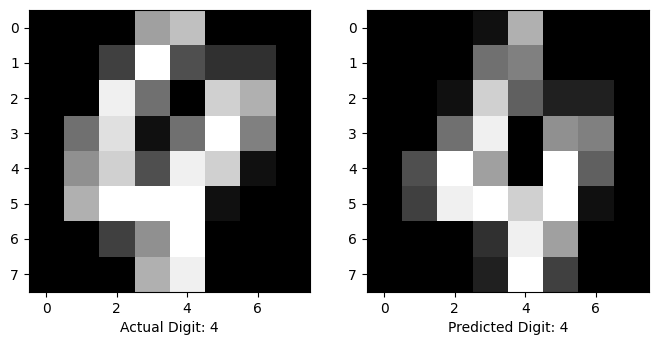

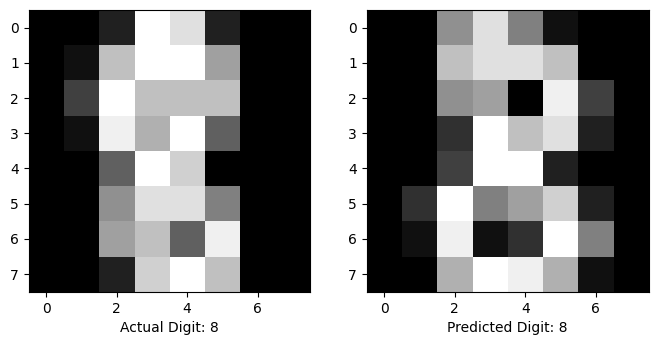

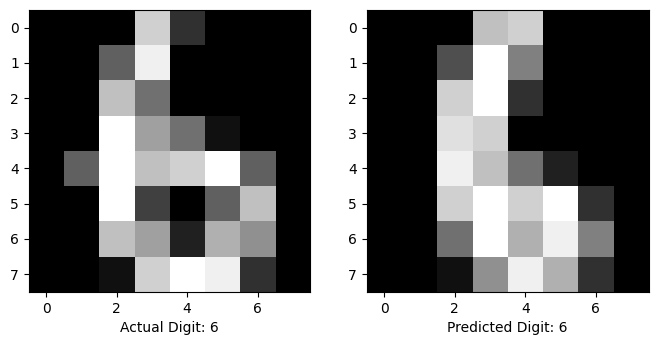

In [20]:
test_model2()
test_model2()
test_model2()
test_model2()

The final model created was done with the Keras API from the Tensorflow libary. The input data was split and reshappen just like in the previous two models. The model uses a sequential model with 2 hidden layers with 128 and 64 nodes respectively and uses the ReLU activation function It also has a final output layer with 10 nodes to represent the 10 unique digits that can be identified. The model then is compiled using the Adam optimizer. The sparse categorical crossentropy loss function and accuracy metric were used to calculate loss and accuracy, similar to the previous models. The time taken to train the model was also calculated. Both plots of loss and accuracy are shown below.   

Epoch 1/20
36/36 [==============================] - 1s 7ms/step - loss: 2.2776 - accuracy: 0.2167 - val_loss: 2.2379 - val_accuracy: 0.4444
Epoch 2/20
36/36 [==============================] - 0s 2ms/step - loss: 2.1721 - accuracy: 0.4926 - val_loss: 2.0861 - val_accuracy: 0.6354
Epoch 3/20
36/36 [==============================] - 0s 2ms/step - loss: 1.9562 - accuracy: 0.5640 - val_loss: 1.8229 - val_accuracy: 0.6736
Epoch 4/20
36/36 [==============================] - 0s 3ms/step - loss: 1.6185 - accuracy: 0.6475 - val_loss: 1.4449 - val_accuracy: 0.7812
Epoch 5/20
36/36 [==============================] - 0s 3ms/step - loss: 1.2817 - accuracy: 0.7171 - val_loss: 1.1260 - val_accuracy: 0.8368
Epoch 6/20
36/36 [==============================] - 0s 2ms/step - loss: 1.0347 - accuracy: 0.7668 - val_loss: 0.8968 - val_accuracy: 0.8264
Epoch 7/20
36/36 [==============================] - 0s 2ms/step - loss: 0.8677 - accuracy: 0.7894 - val_loss: 0.7477 - val_accuracy: 0.8299
Epoch 8/20
36/36 [==

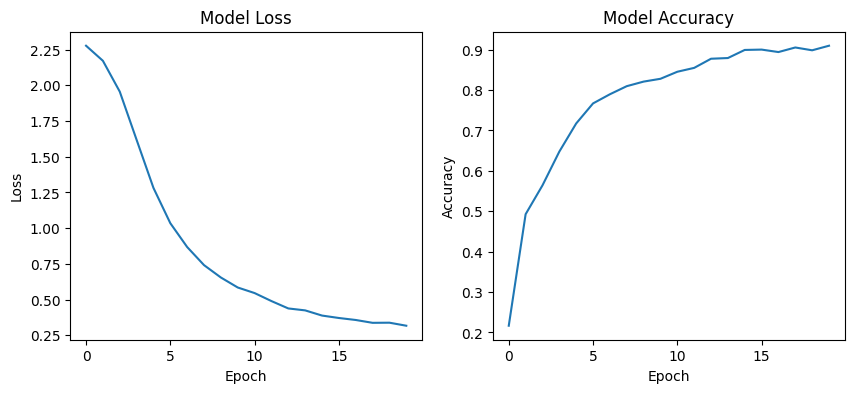

In [29]:
X_train, X_test, y_train, y_test = train_test_split(digits.images, digits.target, test_size=0.2, random_state=100)
# Reshape input data for the keras model to use 
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values to range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Define the keras model architecture (relu & 2 hidden layers)
keras_model = Sequential()
keras_model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(64, activation='relu'))
keras_model.add(Dropout(0.2))
keras_model.add(Dense(10, activation='softmax'))

start_time = time.time()
# Compile the model
keras_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = keras_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)
end_time = time.time()
# Evaluate the model on the test data
test_loss, test_acc = keras_model.evaluate(X_test, y_test)
print(f"Training time for third model: {end_time - start_time} seconds")

fig = plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.show()

A third test function was created to see the results of the Keras model. Given that the Keras API is designed to handle challenging deep learning problems, the simple classification of digits from the load_digits dataset was no issue as all test images were classified accordingly. 

In [22]:
def test_model3():
    ran_num = random.randint(0, 1796)
    test_image = digits.images[ran_num]

    test_image = test_image.reshape(1, -1)
    test_image = test_image.astype('float32') / 255.0

    # Predict the digit class of the test image using the trained model
    predicted_digit = np.argmax(keras_model.predict(test_image), axis=-1)
    print(predicted_digit)
    predicted_image = image_dict[predicted_digit[0]]

    fig = plt.figure(figsize=(8, 4))
    plt.subplot(1,2,1)
    plt.imshow(test_image.reshape(8, 8), cmap='gray')
    plt.xlabel(f'Actual Digit: {digits.target[ran_num]}')
    plt.subplot(1,2,2)
    plt.imshow(predicted_image, cmap='gray')
    plt.xlabel(f'Predicted Digit: {predicted_digit[0]}')

1/1 [==============================] - 0s 55ms/step
[0]
1/1 [==============================] - 0s 21ms/step
[6]
1/1 [==============================] - 0s 21ms/step
[2]
1/1 [==============================] - 0s 20ms/step
[1]


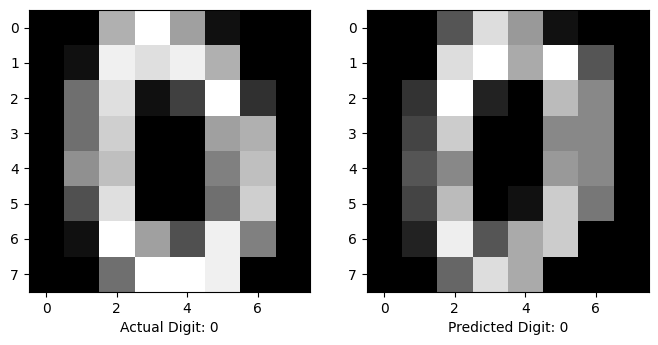

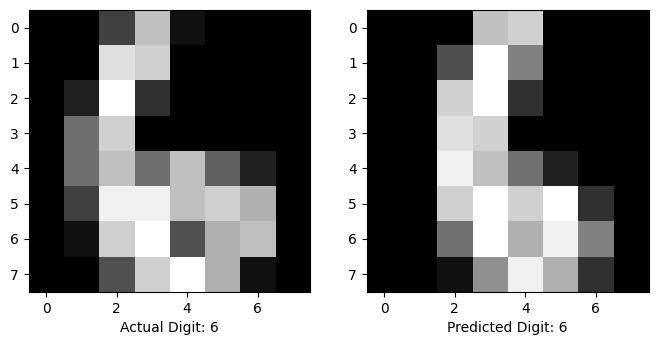

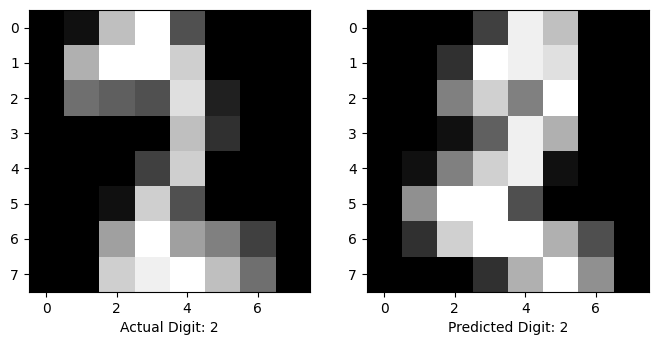

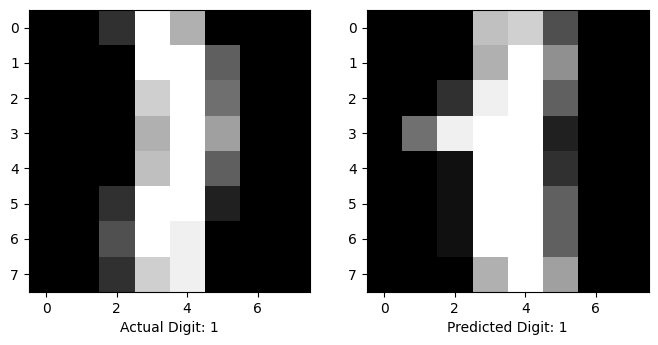

In [23]:
test_model3()
test_model3()
test_model3()
test_model3()